[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0570
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0149
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0100
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0070
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0075
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0060
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0054
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0052 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0051 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Mean Squared Error on Training Data: 38.376652377298576


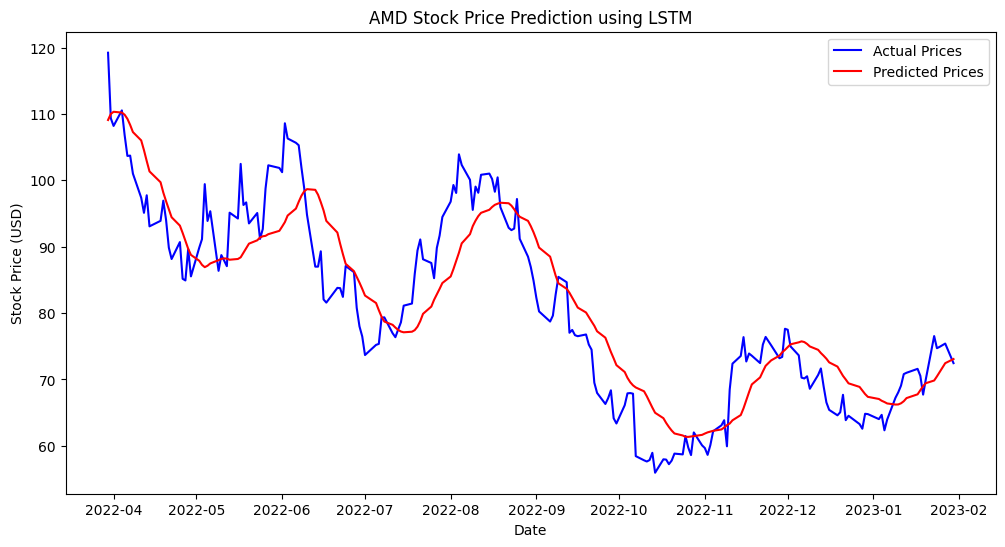

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Define the stock symbol and date range
stock_symbol = 'AMD'
start_date = '2022-01-01'
end_date = '2023-01-31'

# Fetch historical stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Extract closing prices
closing_prices = stock_data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

# Prepare the data for LSTM
def prepare_data(data, n_steps):
    x, y = [], []
    for i in range(len(data) - n_steps):
        x.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(x), np.array(y)

n_steps = 60
x_train, y_train = prepare_data(closing_prices_scaled, n_steps)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = create_lstm_model((x_train.shape[1], 1))
model.fit(x_train, y_train, epochs=10, batch_size=32)

train_predictions = model.predict(x_train)
train_predictions = scaler.inverse_transform(train_predictions)

# Calculate Mean Squared Error
mse = mean_squared_error(closing_prices[n_steps:], train_predictions)
print(f'Mean Squared Error on Training Data: {mse}')

plt.figure(figsize=(12, 6))
plt.plot(stock_data.index[n_steps:], closing_prices[n_steps:], label='Actual Prices', color='blue')
plt.plot(stock_data.index[n_steps:], train_predictions, label='Predicted Prices', color='red')
plt.title(f'{stock_symbol} Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()